# Baseline algorithms and results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler



from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

## Preprocessing

In [7]:
import pandas as pd
df=pd.read_csv('final_with_mask_mandate.csv')
#df

In [8]:
df.sample(5)

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Population,poverty %,% older than 65 years,Food Stamp Recipient %,Edu. < College %,Edu. < Highschool %,CV Death per 100K,Mask_Mandate,Mandatory
4750,01/10/2021,01/04/2020,01/09/2021,MD,Diabetes,Diabetes,E10-E14,0-24,NaN,NaN,1465828.0,8.635732,15.372569,11.193964,62.284733,62.284733,439.727109,7/31/2020,Yes
4696,01/10/2021,01/04/2020,01/09/2021,MD,Circulatory diseases,Cardiac arrhythmia,"I44, I45, I47-I49",75-84,193.0,195.0,1465828.0,8.635732,15.372569,11.193964,62.284733,62.284733,439.727109,7/31/2020,Yes
4329,01/10/2021,01/04/2020,01/09/2021,LA,Vascular and unspecified dementia,Vascular and unspecified dementia,"F01, F03",All Ages,380.0,380.0,4143234.0,20.495926,13.861339,19.126102,76.471251,76.471251,536.091366,7/11/2020,Yes
10558,01/10/2021,01/04/2020,01/09/2021,VT,"Intentional and unintentional injury, poisonin...","Intentional and unintentional injury, poisonin...","S00-T98, V01-X59, X60-X84, X85-Y09, Y10-Y36, Y...",Not stated,0.0,0.0,594060.0,11.171509,17.492161,12.727505,62.442762,62.442762,381.343376,8/1/2020,Yes
1885,01/10/2021,01/04/2020,01/09/2021,DC,Respiratory diseases,Respiratory arrest,R09.2,65-74,0.0,0.0,672391.0,18.500000,11.900000,20.400000,43.400000,43.400000,499.800000,7/22/2020,Yes


In [9]:
df=df.drop('Number of Mentions',axis=1)

In [10]:
df['Mask_Mandate']=df['Mask_Mandate'].fillna(0)

#### 1) Coverting date strings to timestamps

In [11]:
import time
import datetime
s =[] 
for i in df['Mask_Mandate']:
    if str(i)!='0':
        s.append(float(time.mktime(datetime.datetime.strptime(i, '%m/%d/%Y').timetuple())))
    else:
        s.append(0)
for i in s:
    if i==0:
        s[s.index(i)]=sum(s)/len(s)
    
df['Mask_Mandate']=s   

In [12]:
dff=df[['State','Mask_Mandate','Mandatory']].drop_duplicates()

## Final Dataset= Covid, Mask Mandate and Public Health data meged on State codes

In [14]:
df

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Population,poverty %,% older than 65 years,Food Stamp Recipient %,Edu. < College %,Edu. < Highschool %,CV Death per 100K,Mask_Mandate,Mandatory
0,01/10/2021,01/04/2020,01/09/2021,AL,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,NaN,4795735.0,17.268944,15.722246,17.824077,75.348869,75.348869,561.024618,1.594872e+09,Yes
1,01/10/2021,01/04/2020,01/09/2021,AL,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,20.0,4795735.0,17.268944,15.722246,17.824077,75.348869,75.348869,561.024618,1.594872e+09,Yes
2,01/10/2021,01/04/2020,01/09/2021,AL,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,34.0,4795735.0,17.268944,15.722246,17.824077,75.348869,75.348869,561.024618,1.594872e+09,Yes
3,01/10/2021,01/04/2020,01/09/2021,AL,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,90.0,4795735.0,17.268944,15.722246,17.824077,75.348869,75.348869,561.024618,1.594872e+09,Yes
4,01/10/2021,01/04/2020,01/09/2021,AL,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,216.0,4795735.0,17.268944,15.722246,17.824077,75.348869,75.348869,561.024618,1.594872e+09,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11955,01/10/2021,01/04/2020,01/09/2021,PR,COVID-19,COVID-19,U071,65-74,321.0,3263022.0,15.883556,18.054035,14.399250,75.324192,75.324192,295.945035,1.524666e+09,No
11956,01/10/2021,01/04/2020,01/09/2021,PR,COVID-19,COVID-19,U071,75-84,366.0,3263022.0,15.883556,18.054035,14.399250,75.324192,75.324192,295.945035,1.524793e+09,No
11957,01/10/2021,01/04/2020,01/09/2021,PR,COVID-19,COVID-19,U071,85+,264.0,3263022.0,15.883556,18.054035,14.399250,75.324192,75.324192,295.945035,1.524921e+09,No
11958,01/10/2021,01/04/2020,01/09/2021,PR,COVID-19,COVID-19,U071,Not stated,0.0,3263022.0,15.883556,18.054035,14.399250,75.324192,75.324192,295.945035,1.525048e+09,No


Text(0.5, 1.0, 'Mask Mandate vs Population vs Fatalities')

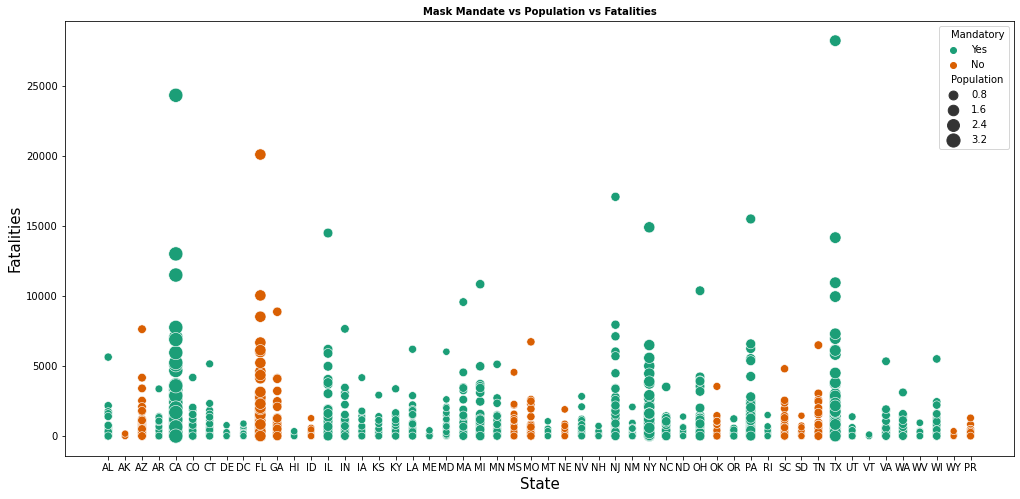

In [168]:
plt.figure(figsize=(17,8))
sns.scatterplot(x="State", y="COVID-19 Deaths",
            hue="Mandatory",size='Population',
            sizes=(50, 200), palette="Dark2", data=df)

plt.xlabel("State", size=15)
plt.ylabel("Fatalities", size=15)
plt.title("Mask Mandate vs Population vs Fatalities",size=10, weight='bold')

In [167]:
df

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Population,poverty %,% older than 65 years,Food Stamp Recipient %,Edu. < College %,Edu. < Highschool %,CV Death per 100K,Mask_Mandate,Mandatory
0,01/10/2021,01/04/2020,01/09/2021,AL,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,NaN,4795735.0,17.268944,15.722246,17.824077,75.348869,75.348869,561.024618,1.594872e+09,Yes
1,01/10/2021,01/04/2020,01/09/2021,AL,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,20.0,4795735.0,17.268944,15.722246,17.824077,75.348869,75.348869,561.024618,1.594872e+09,Yes
2,01/10/2021,01/04/2020,01/09/2021,AL,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,34.0,4795735.0,17.268944,15.722246,17.824077,75.348869,75.348869,561.024618,1.594872e+09,Yes
3,01/10/2021,01/04/2020,01/09/2021,AL,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,90.0,4795735.0,17.268944,15.722246,17.824077,75.348869,75.348869,561.024618,1.594872e+09,Yes
4,01/10/2021,01/04/2020,01/09/2021,AL,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,216.0,4795735.0,17.268944,15.722246,17.824077,75.348869,75.348869,561.024618,1.594872e+09,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11955,01/10/2021,01/04/2020,01/09/2021,PR,COVID-19,COVID-19,U071,65-74,321.0,3263022.0,15.883556,18.054035,14.399250,75.324192,75.324192,295.945035,1.524666e+09,No
11956,01/10/2021,01/04/2020,01/09/2021,PR,COVID-19,COVID-19,U071,75-84,366.0,3263022.0,15.883556,18.054035,14.399250,75.324192,75.324192,295.945035,1.524793e+09,No
11957,01/10/2021,01/04/2020,01/09/2021,PR,COVID-19,COVID-19,U071,85+,264.0,3263022.0,15.883556,18.054035,14.399250,75.324192,75.324192,295.945035,1.524921e+09,No
11958,01/10/2021,01/04/2020,01/09/2021,PR,COVID-19,COVID-19,U071,Not stated,0.0,3263022.0,15.883556,18.054035,14.399250,75.324192,75.324192,295.945035,1.525048e+09,No


#### 2) Mean-imputing Covid-19 deaths and mask mandate

In [36]:
columns=['COVID-19 Deaths']
for i in columns:
    mean = df[i].mean()
    df[i].fillna(mean, inplace=True)


In [37]:
df.isnull().sum()

Data as of                0
Start Week                0
End Week                  0
State                     0
Condition Group           0
Condition                 0
ICD10_codes               0
Age Group                 0
COVID-19 Deaths           0
Population                0
poverty %                 0
% older than 65 years     0
Food Stamp Recipient %    0
Edu. < College %          0
Edu. < Highschool %       0
CV Death per 100K         0
Mask_Mandate              0
Mandatory                 0
dtype: int64

#### 3) Converting categorical to numerical features

In [38]:


df['State']= df['State'].astype("category").cat.codes
df['Condition Group'] = df['Condition Group'].astype("category").cat.codes
df['ICD10_codes'] = df['ICD10_codes'].astype("category").cat.codes
df['Age Group'] = df['Age Group'].astype("category").cat.codes
df['Condition'] = df['Condition'].astype("category").cat.codes
df['Mandatory'] = df['Mandatory'].astype("category").cat.codes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11960 entries, 0 to 11959
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Data as of              11960 non-null  object 
 1   Start Week              11960 non-null  object 
 2   End Week                11960 non-null  object 
 3   State                   11960 non-null  int8   
 4   Condition Group         11960 non-null  int8   
 5   Condition               11960 non-null  int8   
 6   ICD10_codes             11960 non-null  int8   
 7   Age Group               11960 non-null  int8   
 8   COVID-19 Deaths         11960 non-null  float64
 9   Population              11960 non-null  float64
 10  poverty %               11960 non-null  float64
 11  % older than 65 years   11960 non-null  float64
 12  Food Stamp Recipient %  11960 non-null  float64
 13  Edu. < College %        11960 non-null  float64
 14  Edu. < Highschool %     11960 non-null

#### 4) Dropping columns that aren't necessary for predictive modeling 

In [40]:
model = df.drop(columns=['Data as of','Start Week' ,'End Week'])
model.isnull().sum()

State                     0
Condition Group           0
Condition                 0
ICD10_codes               0
Age Group                 0
COVID-19 Deaths           0
Population                0
poverty %                 0
% older than 65 years     0
Food Stamp Recipient %    0
Edu. < College %          0
Edu. < Highschool %       0
CV Death per 100K         0
Mask_Mandate              0
Mandatory                 0
dtype: int64

In [41]:
import numpy as np
model['COVID-19 Deaths'] = np.log(model['COVID-19 Deaths']+1)

In [42]:
model.columns

Index(['State', 'Condition Group', 'Condition', 'ICD10_codes', 'Age Group',
       'COVID-19 Deaths', 'Population', 'poverty %', '% older than 65 years',
       'Food Stamp Recipient %', 'Edu. < College %', 'Edu. < Highschool %',
       'CV Death per 100K', 'Mask_Mandate', 'Mandatory'],
      dtype='object')

In [48]:
cols = list(model.columns)
cols.append(cols.pop(cols.index('COVID-19 Deaths')))
cols

['State',
 'Condition Group',
 'Condition',
 'ICD10_codes',
 'Age Group',
 'Population',
 'poverty %',
 '% older than 65 years',
 'Food Stamp Recipient %',
 'Edu. < College %',
 'Edu. < Highschool %',
 'CV Death per 100K',
 'Mask_Mandate',
 'Mandatory',
 'COVID-19 Deaths']

In [49]:
model=model[cols]

In [50]:
model_x, model_y = model.iloc[:,:-1], model.iloc[:,-1]

#### 5) Standardizing the data

In [51]:
scaler = MinMaxScaler()
model_x = scaler.fit_transform(model_x)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(model_x, model_y, test_size=0.3,random_state=42)

## Predictive Modeling

### 1) Linear Regression

In [53]:
# Create linear regression object
regr = linear_model.LinearRegression(n_jobs= 10)

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(n_jobs=10)

In [54]:
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('R2 score: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [-0.09489381  0.00605138 -0.42698287  0.3993506   0.52574224  2.78898575
 -0.34839228 -0.13585513  0.04730885 -0.06158979 -0.06158979  0.69949855
 -0.02592203 -0.08268591]
Mean squared error: 5.47
R2 score: 0.05


### 2) Decision Tree Regressor

In [81]:
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=9,max_features=9)

# Train Decision Tree Classifer
regr_1.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = regr_1.predict(X_test)

In [80]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


Mean squared error: 2.48
Coefficient of determination: 0.57


### 3) Support Vector Regressor

In [100]:
from sklearn.svm import SVR

regr_2 = SVR(kernel='poly',C=3)

# Train Decision Tree Classifer
regr_2.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = regr_2.predict(X_test)

In [101]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 3.71
Coefficient of determination: 0.35


### 4) Random Forest Regressor

In [131]:
from sklearn.ensemble import RandomForestRegressor
regr_2 = RandomForestRegressor(n_estimators=9, max_depth= 13)

# Train Decision Tree Classifer
regr_2.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = regr_2.predict(X_test)

In [132]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 2.12
Coefficient of determination: 0.63


### Implementing K-Fold cross validation

In [133]:
kfold_cv=KFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in kfold_cv.split(model_x,model_y):
    X_train, X_test = model_x[train_index], model_x[test_index]
    y_train, y_test = model_y[train_index], model_y[test_index]

In [134]:
Poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train = Poly.fit_transform(X_train)
X_test = Poly.fit_transform(X_test)

### 1) Linear Regression

In [135]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [136]:
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('R2 score: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [-5.35426208e+00 -2.48239786e+00  6.32527286e-01  4.87980507e-02
  1.24030113e+00 -1.70903589e+01 -1.14311181e+01  9.05688777e+00
  1.84879470e+01 -1.56349805e+01 -1.56349805e+01  7.66216639e+00
 -4.06487925e+01  1.43612838e+01  1.20399590e-01  1.54306098e-01
 -6.20541254e-02  5.29103254e-01 -5.62025815e-01  6.23474239e+00
 -2.11003887e+00  2.49756209e+00  1.95733470e-01  1.95733470e-01
 -6.72665497e+00  5.93209377e+00 -5.87036701e-01  1.40803841e+00
  4.15242063e+00 -5.02659340e-01 -4.83414274e-01  1.59391816e+00
 -1.03138203e-01 -6.48188971e-01 -4.42768075e-01 -4.42768075e-01
 -4.47873118e-01  1.90367118e-02 -1.63797612e-01 -4.34140273e+00
  1.35092518e-01 -1.35061960e-01 -8.93041868e-01  1.01254272e-01
  1.49089931e-01  6.04038075e-01  6.04038075e-01  1.29535529e-01
  8.29226113e-02  2.23425772e-01 -4.96674824e-01  5.93863538e-01
  2.25849777e-01  1.90566001e-01 -1.60469548e-01  5.60848244e-01
  5.60848244e-01 -4.42115410e-01  1.31008929e-01  9.17530809e-02
 -2.98180

### 2) Decision Tree Regressor

In [141]:
from sklearn.tree import DecisionTreeRegressor

regr_2 = DecisionTreeRegressor(max_depth=6)

# Train Decision Tree Classifer
regr_2.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = regr_2.predict(X_test)

In [142]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 2.61
Coefficient of determination: 0.54


### 3) Support Vector Regressor

In [180]:
from sklearn.svm import SVR

regr_2 = SVR()

# Train Decision Tree Classifer
regr_2.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = regr_2.predict(X_test)

In [181]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 4.03
Coefficient of determination: 0.30


### 4) Random Forest Regressor

In [182]:
from sklearn.ensemble import RandomForestRegressor
regr_2 = RandomForestRegressor()

# Train Decision Tree Classifer
regr_2.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = regr_2.predict(X_test)

In [183]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 2.03
Coefficient of determination: 0.65


In [143]:
df

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Population,poverty %,% older than 65 years,Food Stamp Recipient %,Edu. < College %,Edu. < Highschool %,CV Death per 100K,Mask_Mandate,Mandatory
0,01/10/2021,01/04/2020,01/09/2021,1,9,11,15,0,240.544942,4795735.0,17.268944,15.722246,17.824077,75.348869,75.348869,561.024618,1.594872e+09,1
1,01/10/2021,01/04/2020,01/09/2021,1,9,11,15,1,20.000000,4795735.0,17.268944,15.722246,17.824077,75.348869,75.348869,561.024618,1.594872e+09,1
2,01/10/2021,01/04/2020,01/09/2021,1,9,11,15,2,34.000000,4795735.0,17.268944,15.722246,17.824077,75.348869,75.348869,561.024618,1.594872e+09,1
3,01/10/2021,01/04/2020,01/09/2021,1,9,11,15,3,90.000000,4795735.0,17.268944,15.722246,17.824077,75.348869,75.348869,561.024618,1.594872e+09,1
4,01/10/2021,01/04/2020,01/09/2021,1,9,11,15,4,216.000000,4795735.0,17.268944,15.722246,17.824077,75.348869,75.348869,561.024618,1.594872e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11955,01/10/2021,01/04/2020,01/09/2021,39,2,3,22,5,321.000000,3263022.0,15.883556,18.054035,14.399250,75.324192,75.324192,295.945035,1.524666e+09,0
11956,01/10/2021,01/04/2020,01/09/2021,39,2,3,22,6,366.000000,3263022.0,15.883556,18.054035,14.399250,75.324192,75.324192,295.945035,1.524793e+09,0
11957,01/10/2021,01/04/2020,01/09/2021,39,2,3,22,7,264.000000,3263022.0,15.883556,18.054035,14.399250,75.324192,75.324192,295.945035,1.524921e+09,0
11958,01/10/2021,01/04/2020,01/09/2021,39,2,3,22,9,0.000000,3263022.0,15.883556,18.054035,14.399250,75.324192,75.324192,295.945035,1.525048e+09,0
